In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [168]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


5. How many rows and columns are in gdp_df? What are the data types of each column?

In [169]:
gdp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [170]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)

In [171]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [172]:
n_by_year = gdp_df.groupby(["Year"])["Country"].count()
print(n_by_year)

Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: Country, dtype: int64


In [173]:
n_by_country = gdp_df.groupby(["Country"])["Year"].count()
print(n_by_country.head())

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
Name: Year, dtype: int64


In [174]:
n_by_country.value_counts()

31    205
26     11
21      6
24      4
27      2
8       2
30      2
10      2
19      1
28      1
15      1
13      1
22      1
17      1
29      1
20      1
Name: Year, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [175]:
gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]
print(gdp_2020.head())

                         Country  Year  GDP_Per_Capita
0                    Afghanistan  2020     1970.560169
19   Africa Eastern and Southern  2020     3491.978104
50    Africa Western and Central  2020     4021.293919
81                       Albania  2020    13253.733337
112                      Algeria  2020    10735.382539


(array([110.,  60.,  23.,  20.,  14.,   6.,   3.,   1.,   2.,   1.]),
 array([   731.06407364,  11913.68861346,  23096.31315328,  34278.9376931 ,
         45461.56223291,  56644.18677273,  67826.81131255,  79009.43585237,
         90192.06039218, 101374.684932  , 112557.30947182]),
 <BarContainer object of 10 artists>)

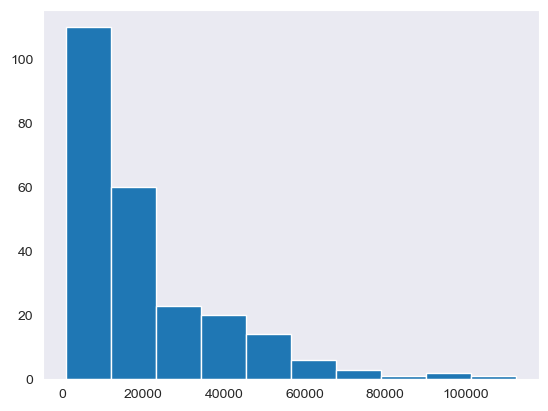

In [176]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
plt.hist(gdp_2020['GDP_Per_Capita'], bins=10)


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

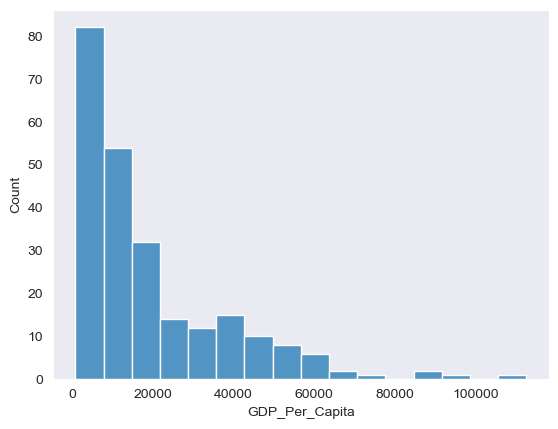

In [177]:
sns.histplot(data = gdp_2020
            ,x = 'GDP_Per_Capita',
                       )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

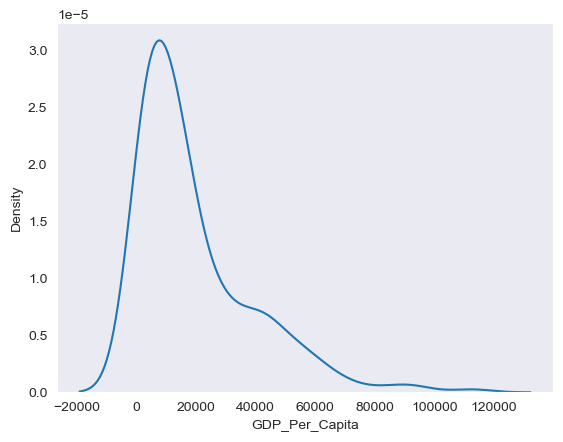

In [178]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

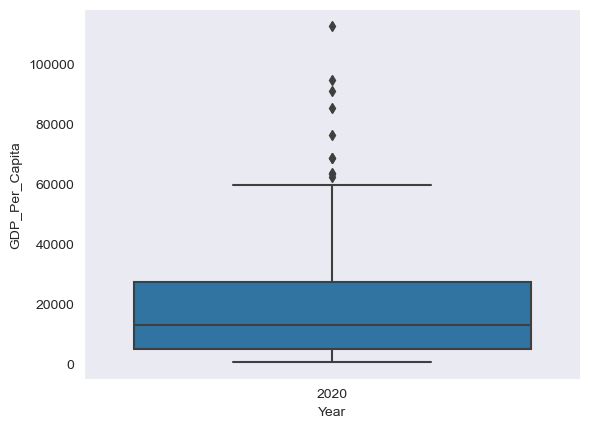

In [179]:
sns.boxplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

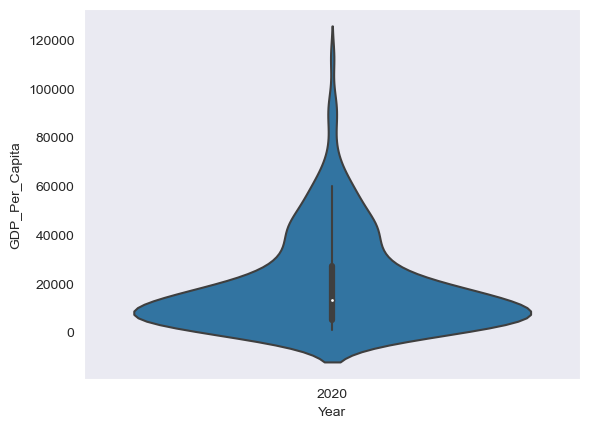

In [180]:
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])


9. What was the median GDP per capita value in 2020?

In [181]:
print("GDP per capita, 2020 : ", gdp_2020['GDP_Per_Capita'].median())

GDP per capita, 2020 :  12908.9374056206


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

a) A boxplot
b) A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
c) A scatterplot
d) A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [182]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

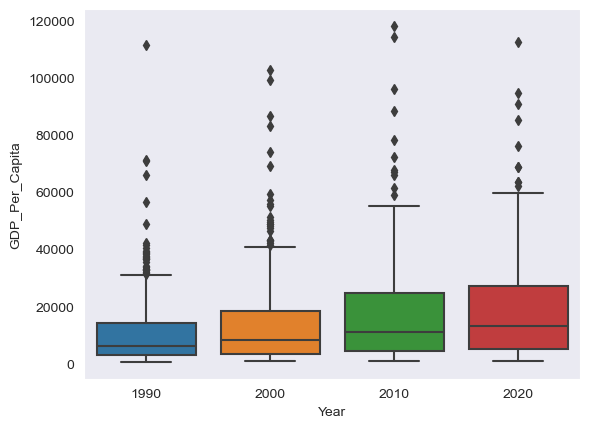

In [183]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])


<BarContainer object of 918 artists>

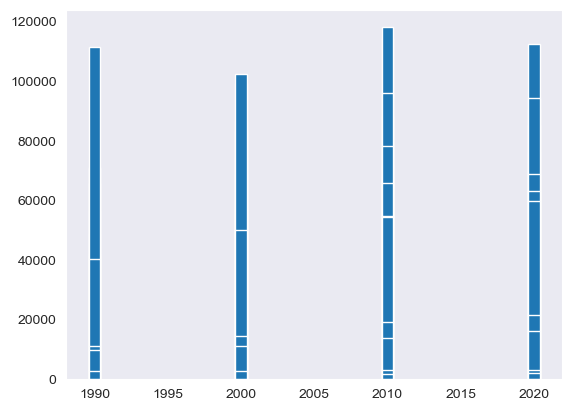

In [184]:
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita)

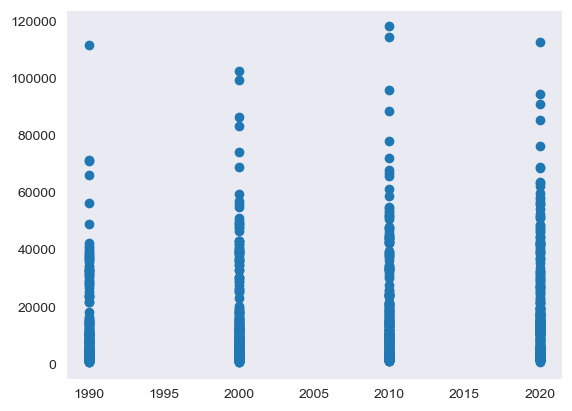

In [185]:
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita)

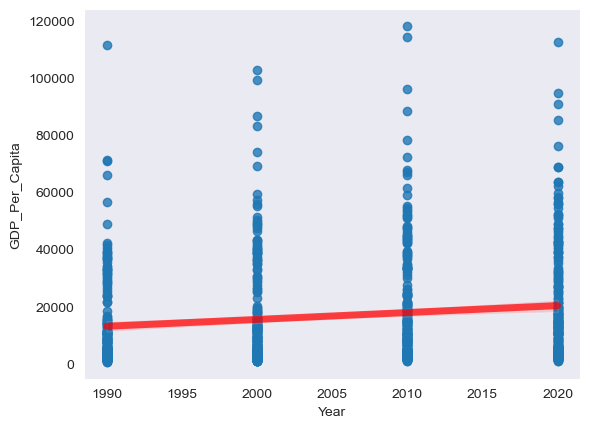

In [186]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [187]:
gdp_100k = gdp_df["GDP_Per_Capita"] > 100000
gdp_df[gdp_100k].sort_values("Year")

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665
6837,United Arab Emirates,1991,106103.552655
6836,United Arab Emirates,1992,103470.924576
6834,United Arab Emirates,1994,100213.156226
6833,United Arab Emirates,1995,101570.992100
6832,United Arab Emirates,1996,102211.638844
6831,United Arab Emirates,1997,105108.996265
6830,United Arab Emirates,1998,100100.435658
6828,United Arab Emirates,2000,102494.714624
3901,Luxembourg,2001,101143.147977


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [188]:
gdp_2020.sort_values("GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


In [189]:
gdp_lux = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']
print(gdp_lux.head())

         Country  Year  GDP_Per_Capita
3882  Luxembourg  2020   112557.309472
3883  Luxembourg  2019   116518.276815
3884  Luxembourg  2018   115049.926079
3885  Luxembourg  2017   114985.842236
3886  Luxembourg  2016   116283.699681


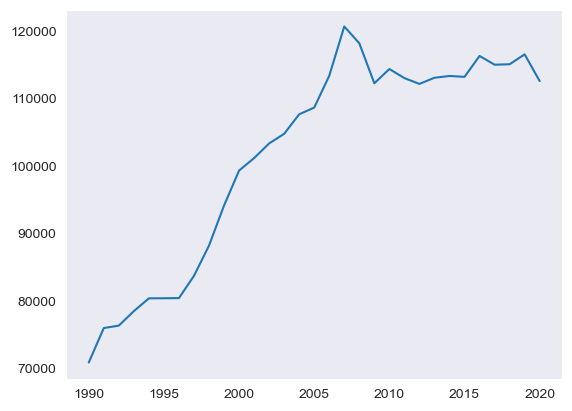

In [190]:
plt.plot(gdp_lux.Year, gdp_lux.GDP_Per_Capita);


13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?



In [191]:
gdp_2020.sort_values("GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930
...,...,...,...
639,Bermuda,2020,76105.138057
5381,Qatar,2020,85290.450430
3071,Ireland,2020,90789.221024
5720,Singapore,2020,94505.636160


In [192]:
gdp_burundi = gdp_df.loc[gdp_df['Country'] == 'Burundi']
print(gdp_burundi.head())

     Country  Year  GDP_Per_Capita
914  Burundi  2020      731.064074
915  Burundi  2019      751.443405
916  Burundi  2018      761.524143
917  Burundi  2017      773.572859
918  Burundi  2016      794.604340


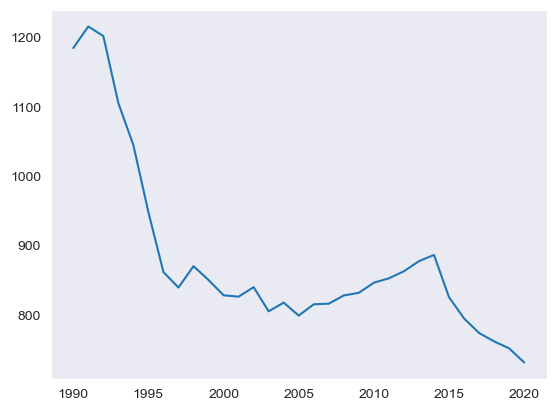

In [193]:
plt.plot(gdp_burundi.Year, gdp_burundi.GDP_Per_Capita)

In [194]:
mean_1990= gdp_df[gdp_df["Year"] == 1990]["GDP_Per_Capita"].mean()
print("GDP per capita, 1990 : ", mean_1990)

GDP per capita, 1990 :  12465.941627925598


In [195]:
mean_2020= gdp_df[gdp_df["Year"] == 2020]["GDP_Per_Capita"].mean()
print("GDP per capita, 2020 : ", mean_2020)

GDP per capita, 2020 :  19496.88171245749


14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [196]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
print(internet_df.head())
print(internet_df.tail())


  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN


In [197]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [198]:
internet_df.drop('Value Footnotes', axis=1, inplace=True)

In [199]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


16. Look at the number of observations in this dataset per year. What do you notice?

In [200]:
internet_by_year = internet_df.groupby(["Year"])["Country"].count()
print(internet_by_year)

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Country, dtype: int64


17. What is the first year to have a non-zero internet users percentage value?

In [201]:
non_zero = internet_df.loc[internet_df['Internet_Users_Pct'] > 0]

In [202]:
non_zero.sort_values("Year", ascending=True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


18. How does the distribution of internet users percent differ for 2000 and 2014?

(array([120.,  30.,  12.,   5.,   5.,   6.,   5.,   3.,   8.,   5.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <BarContainer object of 10 artists>)

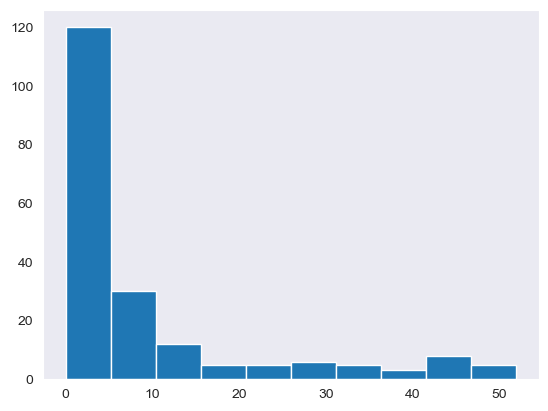

In [203]:
internet_2020 = internet_df[internet_df["Year"] == 2000]
plt.hist(internet_2020['Internet_Users_Pct'], bins=10)

(array([31., 31., 12., 10., 24., 18., 21., 20., 18., 17.]),
 array([ 0.   ,  9.816, 19.632, 29.448, 39.264, 49.08 , 58.896, 68.712,
        78.528, 88.344, 98.16 ]),
 <BarContainer object of 10 artists>)

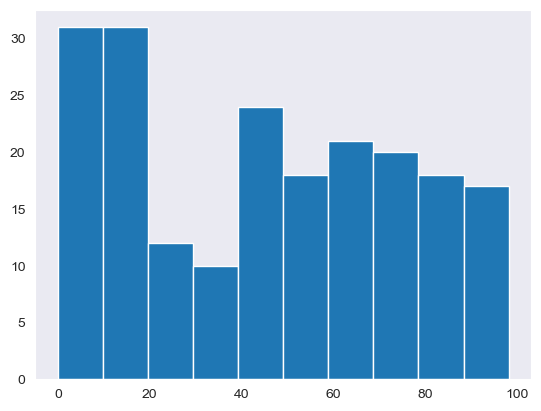

In [204]:
internet_2014 = internet_df[internet_df["Year"] == 2014]
plt.hist(internet_2014['Internet_Users_Pct'], bins=10)

19. For how many countries was the percentage of internet users below 5% in 2014?

In [205]:
internet_2014[internet_2014["Internet_Users_Pct"] < 5].count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [206]:
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer')
print(gdp_and_internet_use.head(10))
print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2020     1970.560169                 NaN
1  Afghanistan  2019     2065.036235                 NaN
2  Afghanistan  2018     2033.804389                 NaN
3  Afghanistan  2017     2058.400221                 NaN
4  Afghanistan  2016     2057.067978                 NaN
5  Afghanistan  2015     2068.265904                 NaN
6  Afghanistan  2014     2102.384604            6.390000
7  Afghanistan  2013     2116.465258            5.900000
8  Afghanistan  2012     2075.491614            5.454545
9  Afghanistan  2011     1904.559926            5.000000
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
8251   Yemen  1999             NaN            0.056629
8252   Yemen  1998             NaN            0.023323
8253   Yemen  1997             NaN            0.015025
8254   Yemen  1996             NaN            0.000621
8255   Yemen  1990             NaN            0.000000


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [207]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014]
print(gdp_and_internet_use_2014.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
6                    Afghanistan  2014     2102.384604                6.39
25   Africa Eastern and Southern  2014     3677.319414                 NaN
56    Africa Western and Central  2014     4215.646000                 NaN
87                       Albania  2014    11586.833878               60.10
118                      Algeria  2014    11512.690472               18.09


In [208]:
top_3_2014 = gdp_and_internet_use_2014.sort_values('Internet_Users_Pct', ascending = False).head(3)
print(top_3_2014)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2803  Iceland  2014    50450.741612               98.16
645   Bermuda  2014    77361.104881               96.80
4880   Norway  2014    62390.130313               96.30


In [209]:
top3 = gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == 'Iceland') | (gdp_and_internet_use['Country'] == 'Bermuda') | (gdp_and_internet_use['Country'] == 'Norway')]
print(top3.head())

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
639  Bermuda  2020    76105.138057                 NaN
640  Bermuda  2019    81681.726668                 NaN
641  Bermuda  2018    81423.408453                 NaN
642  Bermuda  2017    81834.955874                 NaN
643  Bermuda  2016    78149.352535                 NaN


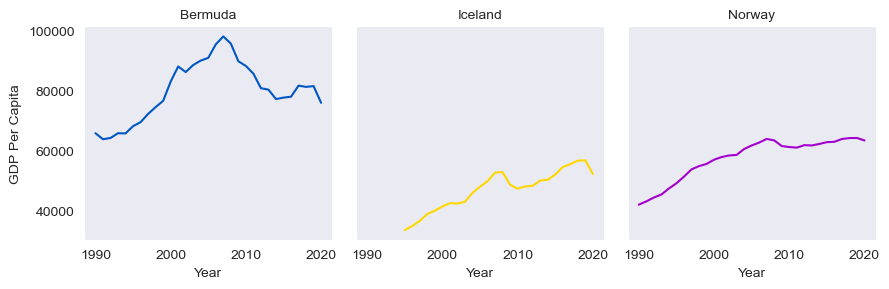

In [210]:
top3_graph = sns.FacetGrid(top3, col='Country', hue='Country', palette='prism')
top3_graph.map_dataframe(sns.lineplot, x="Year",  y="GDP_Per_Capita")
top3_graph.set_axis_labels('Year', 'GDP Per Capita')
top3_graph.set_titles(col_template='{col_name}')

22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [211]:
print(gdp_and_internet_use_2014.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
6                    Afghanistan  2014     2102.384604                6.39
25   Africa Eastern and Southern  2014     3677.319414                 NaN
56    Africa Western and Central  2014     4215.646000                 NaN
87                       Albania  2014    11586.833878               60.10
118                      Algeria  2014    11512.690472               18.09


In [212]:
gdp_and_internet_use_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 6 to 8236
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             281 non-null    object 
 1   Year                281 non-null    int64  
 2   GDP_Per_Capita      242 non-null    float64
 3   Internet_Users_Pct  202 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.0+ KB


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [213]:
sns.set_style('dark')

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

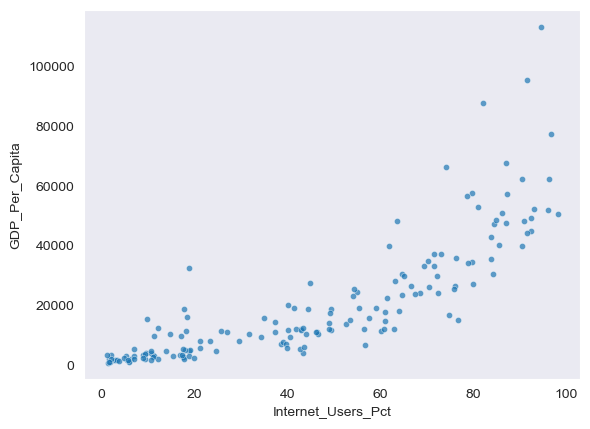

In [214]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", y="GDP_Per_Capita", s=20, alpha=0.7)


24. Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [215]:
pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita,3)

6          (822.61, 6932.415]
25         (822.61, 6932.415]
56         (822.61, 6932.415]
87      (6932.415, 19824.328]
118     (6932.415, 19824.328]
                ...          
8147                      NaN
8170                      NaN
8194                      NaN
8214                      NaN
8236                      NaN
Name: GDP_Per_Capita, Length: 281, dtype: category
Categories (3, interval[float64, right]): [(822.61, 6932.415] < (6932.415, 19824.328] < (19824.328, 155201.741]]

In [222]:
gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, ['Low', 'Medium', 'High'])
print(gdp_and_internet_use_2014.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6                    Afghanistan  2014     2102.384604                6.39   
25   Africa Eastern and Southern  2014     3677.319414                 NaN   
56    Africa Western and Central  2014     4215.646000                 NaN   
87                       Albania  2014    11586.833878               60.10   
118                      Algeria  2014    11512.690472               18.09   

    GDP_Group  
6         Low  
25        Low  
56        Low  
87     Medium  
118    Medium  


C:\Users\melan\AppData\Local\Temp\ipykernel_15764\3440031094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, ['Low', 'Medium', 'High'])


25. Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [217]:
low_group = gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014['GDP_Group'] == 'Low')]

In [218]:
medium_group = gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014['GDP_Group'] == 'Medium')]

In [219]:
high_group = gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014['GDP_Group'] == 'High')]
print(low_group.head())
print(medium_group.head())
print(high_group.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6                    Afghanistan  2014     2102.384604                6.39   
25   Africa Eastern and Southern  2014     3677.319414                 NaN   
56    Africa Western and Central  2014     4215.646000                 NaN   
459                   Bangladesh  2014     4157.919304                9.60   
614                        Benin  2014     2975.854782                5.30   

    GDP_Group  
6         Low  
25        Low  
56        Low  
459       Low  
614       Low  
                 Country  Year  GDP_Per_Capita  Internet_Users_Pct GDP_Group
87               Albania  2014    11586.833878               60.10    Medium
118              Algeria  2014    11512.690472               18.09    Medium
149               Angola  2014     8240.347981               21.26    Medium
180  Antigua and Barbuda  2014    18104.683788               64.00    Medium
211           Arab World  2014    13994.618680    

In [220]:
import statistics


In [221]:
print('Low Group -', statistics.median(low_group.Internet_Users_Pct))
print('Medium Group -', statistics.median(medium_group.Internet_Users_Pct))
print('High Group -', statistics.median(high_group.Internet_Users_Pct))

Low Group - 1.14
Medium Group - nan
High Group - nan
